In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from pandas import DataFrame, Series

import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


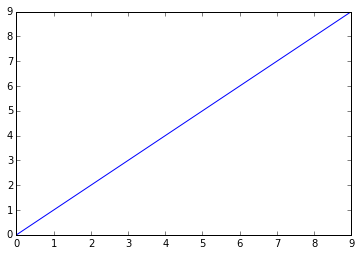

In [3]:
plot(np.arange(10))

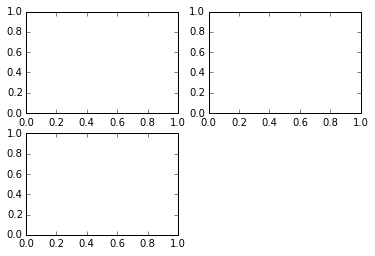

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

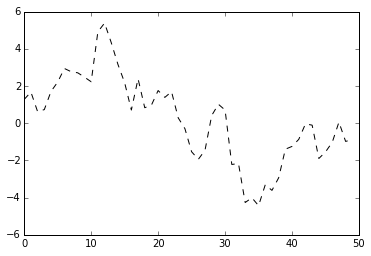

In [5]:
from numpy.random import randn
plt.plot(randn(50).cumsum(), 'k--')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1081b4190>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1083bf8d0>]], dtype=object)

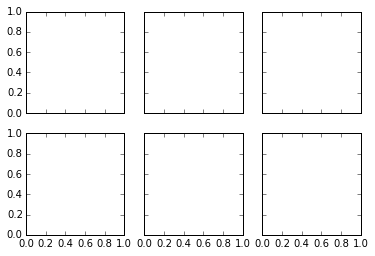

In [8]:
fig, axes = plt.subplots(2,3, sharex=True, sharey=True)
axes


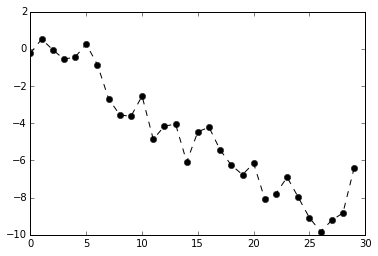

In [9]:
plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

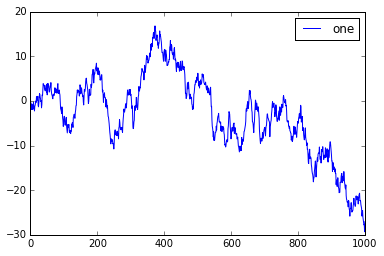

In [22]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(), label='one')
ax.legend(loc='best')

In [23]:
ticks = ax.set_xticks(list(np.arange(0,1001, 250)))
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

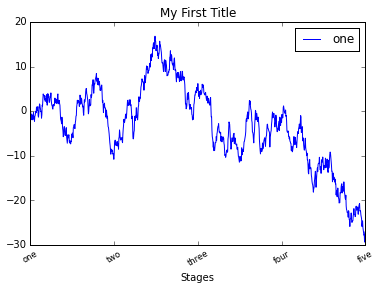

In [24]:
ax.set_title('My First Title')
ax.set_xlabel('Stages')
fig

//anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


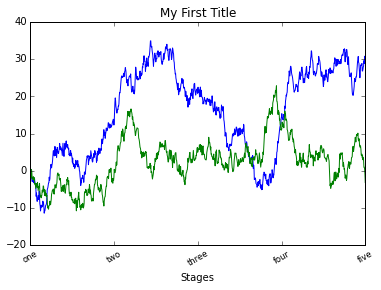

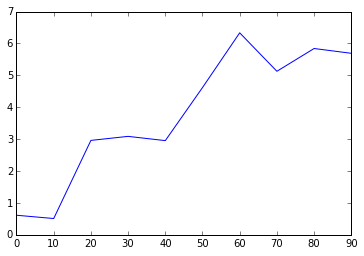

In [26]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s.plot()

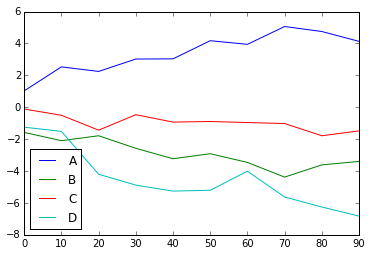

In [29]:
df = DataFrame(np.random.randn(10,4).cumsum(0),
               columns=['A', 'B', 'C', 'D'],
               index=np.arange(0,100,10))
df.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10ac1aa10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x10cb7c710>], dtype=object)

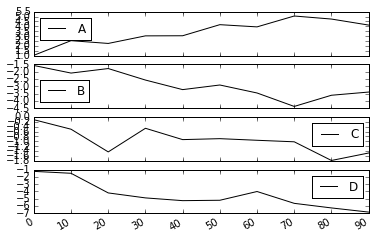

In [33]:
df.plot(subplots=True)

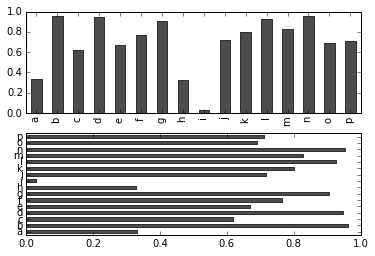

In [37]:
fig, axes = plt.subplots(2,1)

data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot(kind='bar', ax = axes[0], color='k', alpha=.7)
data.plot(kind='barh', ax = axes[1], color='k', alpha = .7)

In [39]:
df = DataFrame(np.random.rand(6,4), index=['one', 'two', 'three', 'four', 'five', 'six'],
               columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df


Genus,A,B,C,D
one,0.290925,0.858959,0.862491,0.960329
two,0.856618,0.357229,0.754962,0.150085
three,0.886151,0.702710,0.632349,0.736825
four,0.861745,0.314581,0.575608,0.520389
five,0.514373,0.271660,0.079354,0.531093
six,0.185074,0.074462,0.453659,0.767114


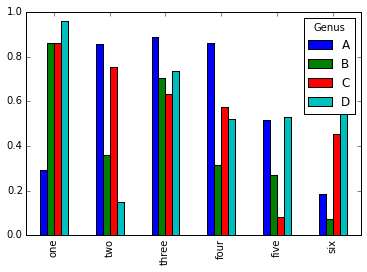

In [40]:
df.plot(kind='bar')

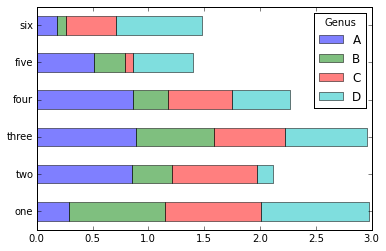

In [41]:
df.plot(kind='barh', stacked=True, alpha=.5)

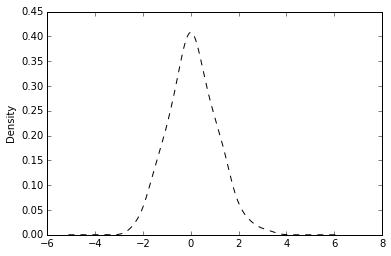

In [43]:
values = Series(np.random.randn(300))
values.plot(kind='kde', style='k--')

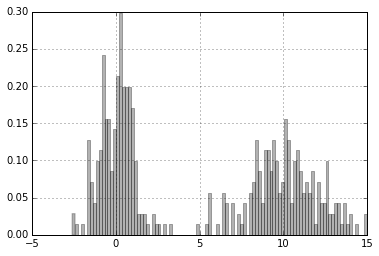

In [44]:
comp1 = np.random.normal(0,1, size=200)
comp2 = np.random.normal(10,2,size=200)
values = Series(np.concatenate([comp1, comp2]))

values.hist(bins=100, alpha=.3, color='k', normed=True)


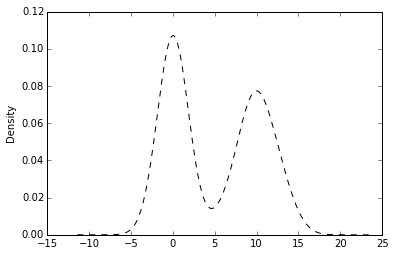

In [45]:
values.plot(kind='kde', style='k--')

In [47]:
data = pd.read_csv('Haiti.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3593 entries, 0 to 3592
Data columns (total 10 columns):
Serial            3593 non-null int64
INCIDENT TITLE    3593 non-null object
INCIDENT DATE     3593 non-null object
LOCATION          3592 non-null object
DESCRIPTION       3593 non-null object
CATEGORY          3587 non-null object
LATITUDE          3593 non-null float64
LONGITUDE         3593 non-null float64
APPROVED          3593 non-null object
VERIFIED          3593 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 308.8+ KB


In [48]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [50]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < - 70) &
            (data.CATEGORY.notnull())]

In [52]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split(' | ')[1]
    return code, names.strip()

get_english('2. Geaux Cats | Go LSU')

('2', 'Go LSU')

In [53]:
all_cats = get_all_categories(data.CATEGORY)
english_mapping = dict(get_english(x) for x in all_cats)
english_mapping['2a']

'Food Shortage'

In [54]:
# create a DF of zeros with the categories as its columns, same index as data:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))),
                        index=data.index, columns=code_index)

dummy_frame.ix[:, :6].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 6 columns):
1     3569 non-null float64
1a    3569 non-null float64
1b    3569 non-null float64
1c    3569 non-null float64
1d    3569 non-null float64
2     3569 non-null float64
dtypes: float64(6)
memory usage: 195.2 KB


In [57]:
# populate the dummy frame...
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1
    
data = data.join(dummy_frame.add_prefix('category_'))

In [58]:
data.ix[:, 10:15].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3569 entries, 0 to 3592
Data columns (total 5 columns):
category_1     3569 non-null float64
category_1a    3569 non-null float64
category_1b    3569 non-null float64
category_1c    3569 non-null float64
category_1d    3569 non-null float64
dtypes: float64(5)
memory usage: 167.3 KB


In [59]:
# making plots...
#from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25, lllon=-75, urlon=-71):
    m = Basemap(ax=ax, project='stere', lon_0=(urlon + lllon) / 2, lat_0=(urlat + lllat) /2,
                llcrnrlat = llllat, urcnrlat=urlat, llcrnrlon=lllon, urcnrlon=urlon,
                resolution='f')
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

ImportError: No module named basemap